In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data_100p.csv", sep=',')
df

,title,artist,album,decade,genre,listeners,playcount,genre_summary,genre_popularity,world_position,russia_position
0,DENIAL IS A RIVER,Doechii,Alligator Bites Never Heal (2024),2020s,Hip-Hop,842751,7343200.0,"Hip-Hop, also spelled Hip Hop or HipHop is a r...",0.405,1.0,NaN
1,Not Like Us,Kendrick Lamar,Not Like Us,2020s,Diss,1514960,21539238.0,"<a href=""http://www.last.fm/tag/Diss"">Read mo...",NaN,2.0,NaN
2,luther (with SZA),Kendrick Lamar,GNX (Spotify),2020s,pop rap,979176,12621484.0,Pop rap is a loosely defined term that refers ...,0.734,3.0,NaN
3,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",2020s,synthpop,1552553,40117708.0,Synthpop is a type of pop music in which the s...,1.365,4.0,NaN
4,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,2020s,alt-pop,1637792,36854162.0,"Alt-pop, short for alternative pop, is a broad...",NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17595,This Fire,Killswitch Engage,Live in Cincinnati,2020s,metalcore,179461,1655066.0,"In the 1980s, various bands in both hardcore p...",3.643,NaN,8396.0
17596,Bury It,CHVRCHES,Every Open Eye,2020s,synthpop,129450,1186742.0,Synthpop is a type of pop music in which the s...,1.365,NaN,8397.0
17597,Молния,Кровосток,Студень,2020s,Hip-Hop,16591,102965.0,"Hip-Hop, also spelled Hip Hop or HipHop is a r...",0.405,NaN,8398.0
17598,Журавли,АнимациЯ,NaN,2020s,NaN,9089,78366.0,"The opposite of all <a href=""http://www.last....",NaN,NaN,8399.0


EDA

In [5]:
duplicate = df.duplicated().sum()
print("Количество дубликатов в датасете:",duplicate)

Количество дубликатов в датасете: 0


In [6]:
titles_unique = df['title'].nunique()
titles_unique

15158

In [7]:
df_sorted = df.copy()
df_sorted['first_letter'] = df_sorted['title'].str[0]
df_sorted = df_sorted.sort_values(by='first_letter')
df_sorted = df_sorted.drop(columns=['first_letter'])

duplicate_songs = df_sorted.duplicated(subset=['title', 'artist'], keep=False)
duplicate_songs = df_sorted[duplicate_songs]

duplicate_songs

,title,artist,album,decade,genre,listeners,playcount,genre_summary,genre_popularity,world_position,russia_position
5386,"""The Take Over, the Breaks Over""",Fall Out Boy,Believers Never Die - Greatest Hits,2020s,rock,335615,2841322.0,Rock music is a form of popular music with a p...,0.541,5387.0,NaN
14660,"""The Take Over, the Breaks Over""",Fall Out Boy,Believers Never Die - Greatest Hits,2020s,rock,335615,2841322.0,Rock music is a form of popular music with a p...,0.541,NaN,5461.0
3589,#3,Aphex Twin,NaN,2020s,NaN,444430,NaN,"The opposite of all <a href=""http://www.last....",NaN,3590.0,NaN
14610,#3,Aphex Twin,NaN,2020s,NaN,444430,NaN,"The opposite of all <a href=""http://www.last....",NaN,NaN,5411.0
12422,'Cause I'm A Man,Tame Impala,none,2020s,psychedelic pop,601085,4547467.0,Psychedelic pop is a psychedelic musical style...,0.388,NaN,3223.0
...,...,...,...,...,...,...,...,...,...,...,...
1852,snowfall,Øneheart,snowfall,2020s,instrumental,530372,8942520.0,"An instrumental is, in contrast to a song, a m...",NaN,1853.0,NaN
14445,this feeling,Øneheart,This Feeling - Single,2020s,chillout,305247,2395868.0,"Chill out (sometimes also chillout, chill-out,...",NaN,NaN,5246.0
7343,this feeling,Øneheart,This Feeling - Single,2020s,chillout,305247,2395868.0,"Chill out (sometimes also chillout, chill-out,...",NaN,7344.0,NaN
1992,the greatest,Lana Del Rey,NaN,2020s,soft rock,567977,8848872.0,"Soft rock (also referred to as mellow rock, li...",0.345,1993.0,NaN


In [8]:
df = df.groupby(['title', 'artist'], as_index=False).agg({
    'album': 'first',
    'decade': 'first',
    'genre': 'first',
    'listeners': 'first',
    'playcount': 'first',
    'genre_summary': 'first',
    'genre_popularity': 'first',
    'world_position': lambda x: np.nanmin(x) if not pd.isna(x).all() else np.nan,
    'russia_position': lambda x: np.nanmin(x) if not pd.isna(x).all() else np.nan
})

In [9]:
df.isnull().sum()

,0
title,0
artist,0
album,2767
decade,0
genre,1909
listeners,0
playcount,368
genre_summary,0
genre_popularity,5647
world_position,7245


Около 16% треков выходят не в альбоме.

Не по всем трекам есть информация к какому жанру они относятся

In [14]:
df = df.fillna({'genre_popularity': 0})

In [15]:
df['genre'] = df['genre'].str.lower()

In [16]:
df = df[df['genre'].astype(str).str.match(r'^\d+$|^[a-zA-Z]$') == False]

In [17]:
df

,title,artist,album,decade,genre,listeners,playcount,genre_summary,genre_popularity,world_position,russia_position
0,"""The Take Over, the Breaks Over""",Fall Out Boy,Believers Never Die - Greatest Hits,2020s,rock,335615,2841322.0,Rock music is a form of popular music with a p...,0.541,5387.0,5461.0
1,"""Где нас нет""",Oxxxymiron,ГОРГОРОД,2020s,rap,12531,189181.0,"Rap is a vocal style, usually coming together ...",0.884,NaN,3929.0
2,"""Полигон""",Oxxxymiron,ГОРГОРОД,2020s,None,9644,114542.0,"The opposite of all <a href=""http://www.last....",0.000,NaN,6691.0
3,#19,Aphex Twin,None,2020s,None,149939,NaN,"The opposite of all <a href=""http://www.last....",0.000,8245.0,NaN
4,#20,Aphex Twin,None,2020s,None,210841,NaN,"The opposite of all <a href=""http://www.last....",0.000,6540.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16440,黄昏のBAY CITY,Junko Yagami,THE BEST SELECTION,2020s,city pop,165984,1227168.0,"In the early 1980s, with the spread of car ste...",1.589,9139.0,NaN
16441,"눈,코,입 (EYES, NOSE, LIPS)",Taeyang,None,2020s,rnb,162046,42986.0,\nRhythm and blues is a term describing popula...,0.000,8527.0,NaN
16442,러시안 룰렛 Russian Roulette,Red Velvet,Russian Roulette - The 3rd Mini Album,2020s,k-pop,534061,8060027.0,"K-pop means Korean pop, which is a musical gen...",1.965,1118.0,NaN
16443,항상 (HANGSANG),J-Hope,None,2020s,hip hop,214248,5358766.0,Hip hop is a musical genre which developed alo...,0.405,4890.0,NaN


In [18]:
df.dtypes

,0
title,object
artist,object
album,object
decade,object
genre,object
listeners,int64
playcount,float64
genre_summary,object
genre_popularity,float64
world_position,float64


Графики


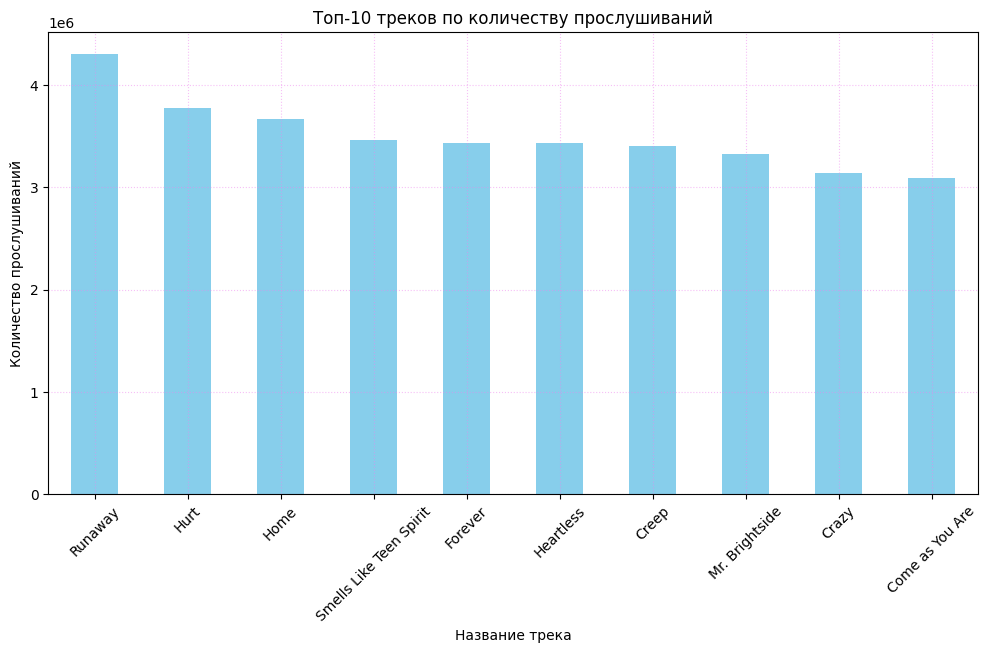

In [19]:
df['listeners'] = pd.to_numeric(df['listeners'], errors='coerce')
artist_listeners = df.groupby('title')['listeners'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
artist_listeners.plot(kind='bar', color = 'skyblue')
plt.xlabel('Название трека')
plt.ylabel('Количество прослушиваний')
plt.title('Топ-10 треков по количеству прослушиваний')
plt.xticks(rotation=45)
plt.grid(linestyle="dotted", alpha=0.5, color = 'violet' )

plt.show()

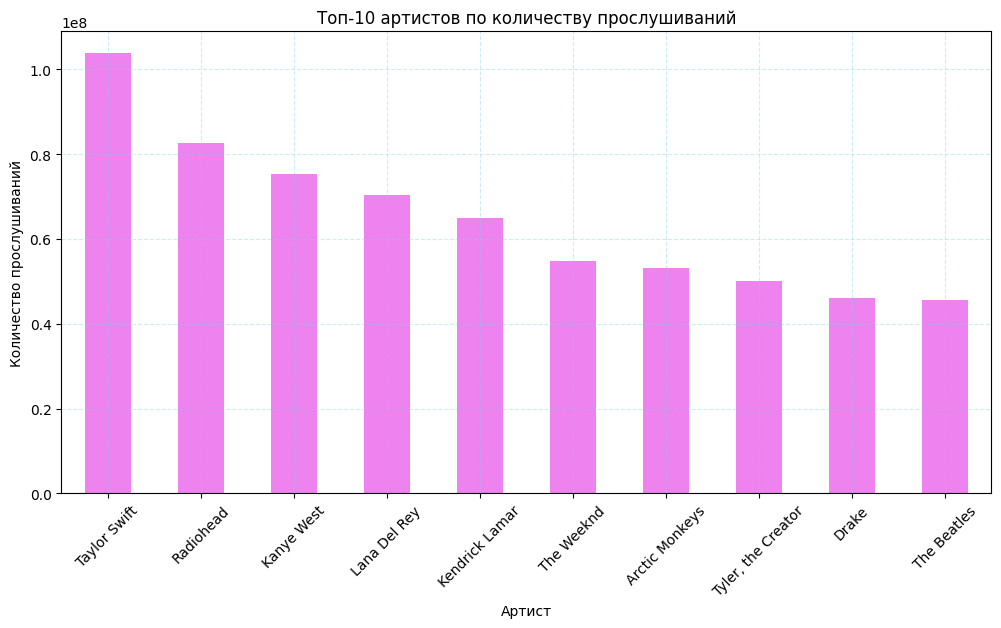

In [20]:
df['listeners'] = pd.to_numeric(df['listeners'], errors='coerce')
artist_listeners = df.groupby('artist')['listeners'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
artist_listeners.plot(kind='bar', color = 'violet')
plt.xlabel('Артист')
plt.ylabel('Количество прослушиваний')
plt.title('Топ-10 артистов по количеству прослушиваний')
plt.xticks(rotation=45)
plt.grid(linestyle="--", alpha=0.4, color = 'skyblue' )

plt.show()


In [27]:
import plotly.express as px
from scraping import GenreScraper

scraper = GenreScraper(verbose=False)
genres = scraper.get_basic_genres()
data = []

for genre in genres:
    row = {'genre' : genre}
    row.update(scraper.get_genre_popularity(genre, weighted=1))
    data.append(row)

genres_df = pd.DataFrame(data)
genres_df = genres_df.fillna(0)

genres_df_melted = genres_df.melt(id_vars='genre', var_name='decade', value_name='popularity')[::-1]

fig = px.line(genres_df_melted, x='decade', y='popularity', color='genre',
              title='Популярность музыкальных жанров по десятилетиям',
              labels={'popularity': 'Показатель популярности', 'decade': 'Десятилетие', 'genre': 'Жанр'},
              markers=True)

fig.update_layout(
    yaxis={'type': 'log'}
)

fig.show()

In [28]:

df1 = df.copy()


df1.loc[:, 'listeners'] = pd.to_numeric(df['listeners'], errors='coerce')
df1.loc[:, 'playcount'] = pd.to_numeric(df['playcount'], errors='coerce')


df1 = df.dropna(subset=['listeners', 'playcount'])

fig = px.scatter(
    df1,
    x='listeners',
    y='playcount',
    size='playcount',
    color='playcount',
    hover_name='title',
    title="Взаимосвязь между количеством слушателей и прослушиваний",
    labels={"listeners": "Количество слушателей", "playcount": "Общее количество прослушиваний"},
    color_continuous_scale='plotly3'
)


fig.show()


In [29]:
both_charts = df[(~df['world_position'].isna()) & (~df['russia_position'].isna())]

<ipython-input-30-c89e035e1ab7>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



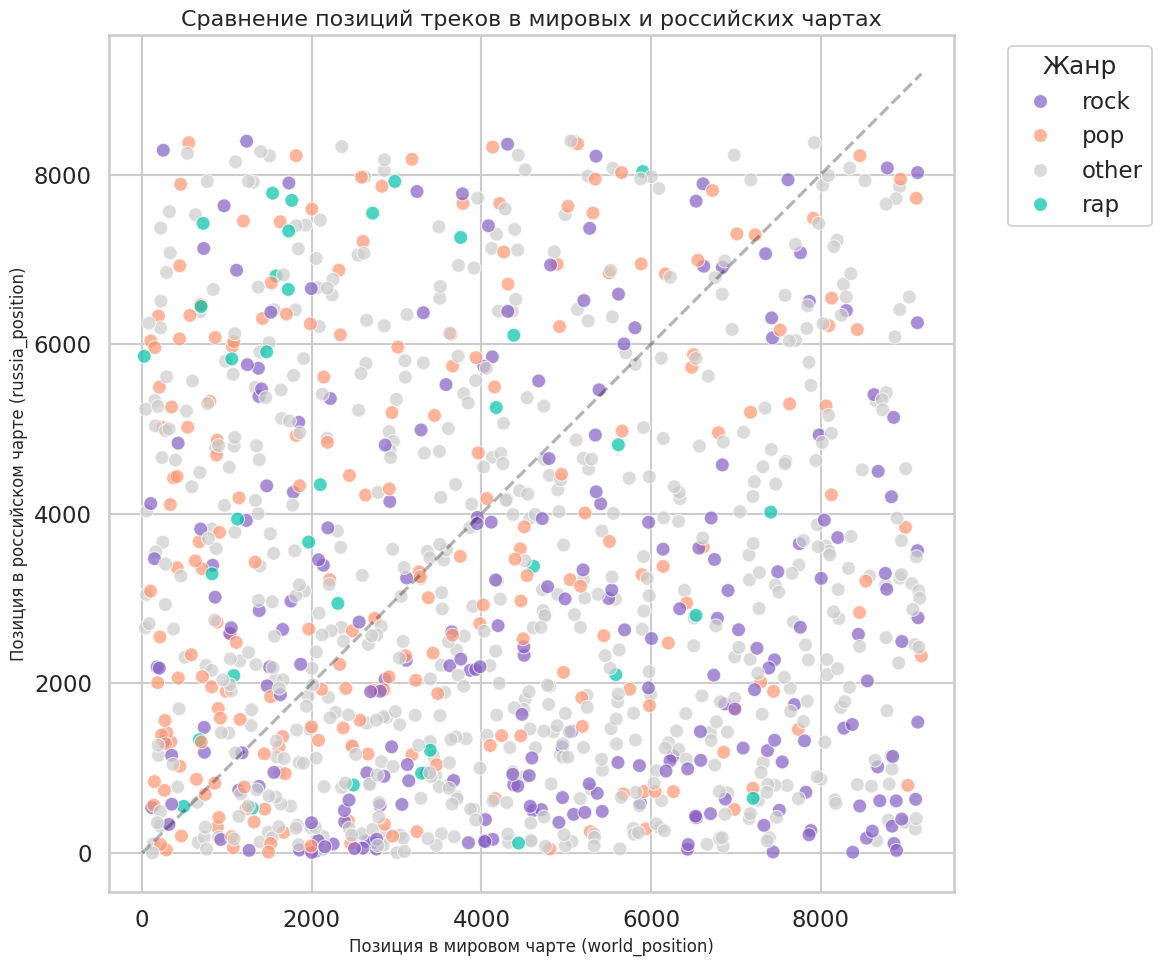

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def simplify_genre(genre):
    if 'pop' in genre:
        return 'pop'
    elif 'rock' in genre:
        return 'rock'
    elif 'rap' in genre:
        return 'rap'
    else:
        return 'other'


colors = {"pop": "#FF9671", "rock": "#845EC2", "rap": "#00C2A8", "other": "#cccccc"}


df_positions = df.dropna(subset=['world_position', 'russia_position', 'genre'])
df_positions['simplified_genre'] = df_positions['genre'].apply(simplify_genre)

plt.figure(figsize=(12, 10))
sns.set_style("whitegrid")
sns.set_context("talk")

sns.scatterplot(
    data=df_positions,
    x='world_position',
    y='russia_position',
    hue='simplified_genre',
    palette=colors,
    alpha=0.7,
    s=100
)

min_val = min(df_positions['world_position'].min(), df_positions['russia_position'].min())
max_val = max(df_positions['world_position'].max(), df_positions['russia_position'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)


plt.title('Сравнение позиций треков в мировых и российских чартах', fontsize=16)
plt.xlabel('Позиция в мировом чарте (world_position)', fontsize=12)
plt.ylabel('Позиция в российском чарте (russia_position)', fontsize=12)
plt.legend(title='Жанр', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.tight_layout()


plt.show()

<ipython-input-31-c8b1b9441483>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



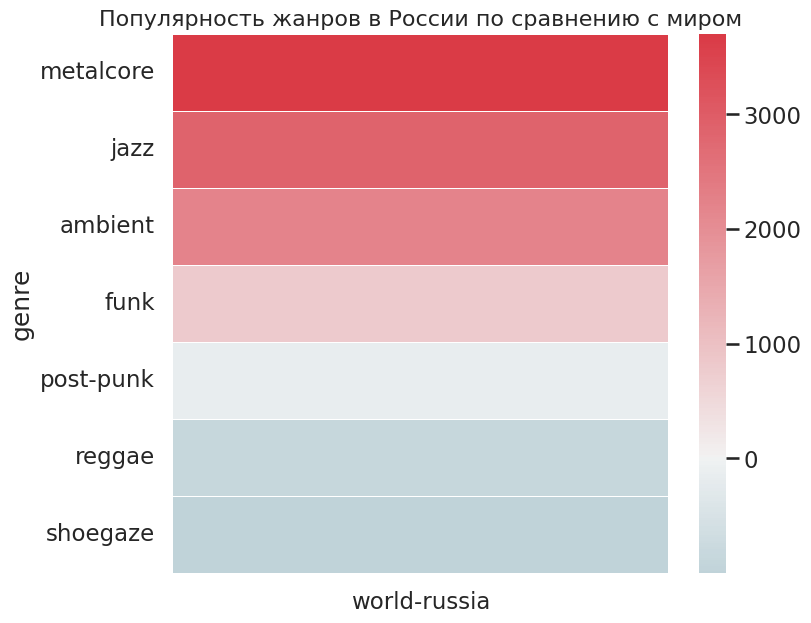

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_positions = df.dropna(subset=['world_position', 'russia_position'])
df_positions['position_diff'] = df_positions['world_position'] - df_positions['russia_position']

genre_stats = df_positions.groupby('genre').agg({
    'position_diff': 'mean',
    'genre_popularity': 'mean',
    'world_position': 'mean',
    'russia_position': 'mean',
    'title': 'count'
}).reset_index()

min_tracks = 3
genre_stats = genre_stats[genre_stats['title'] >= min_tracks]
genre_stats = genre_stats.sort_values('genre_popularity', ascending=False)
top_genres = genre_stats.head(7)
top_genres = top_genres.sort_values('position_diff', ascending=False)

heatmap_data = pd.DataFrame({
    'genre': top_genres['genre'],
    'world-russia': top_genres['position_diff'].round()
})
heatmap_data = heatmap_data.set_index('genre')

plt.figure(figsize=(8, 7))
plt.title('Популярность жанров в России по сравнению с миром', fontsize=16)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = sns.heatmap(
    heatmap_data,
    cmap=cmap,
    center=0,
    linewidths=0.5,
    annot_kws={"size": 14}
)

plt.show()

<ipython-input-32-6bd6e5c80496>:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



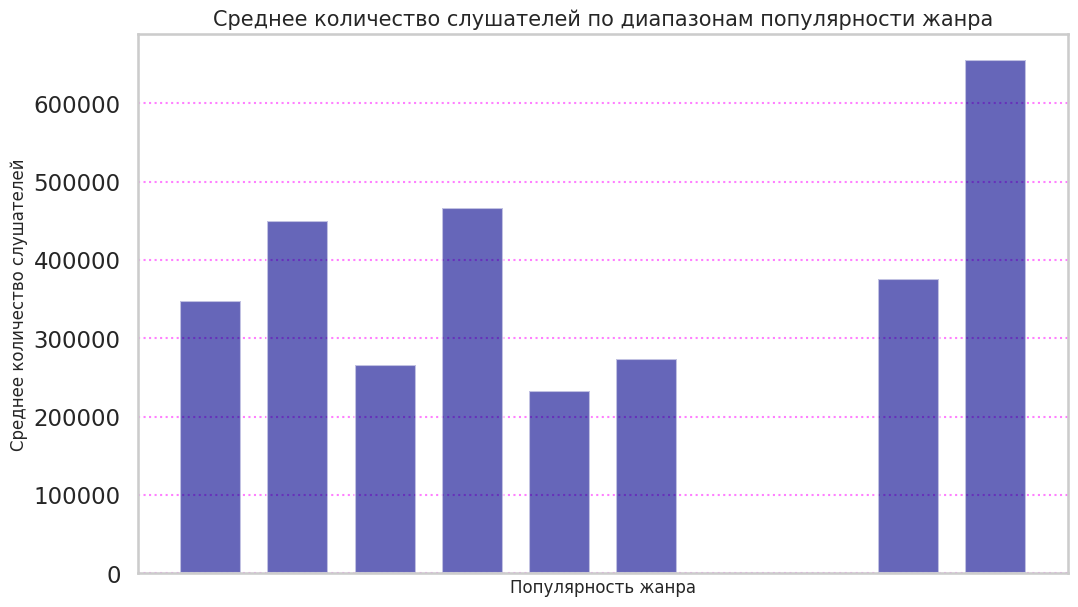

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

min_popularity = df['genre_popularity'].min()
max_popularity = df['genre_popularity'].max()

n_bins = 10
df['genre_popularity_bin'] = pd.cut(
    df['genre_popularity'],
    bins=n_bins
)
bin_stats = df.groupby('genre_popularity_bin').agg({
    'listeners': 'mean',
    'title': 'count'
}).reset_index()

plt.figure(figsize=(12, 7))

bars = plt.bar(
    range(len(bin_stats)),
    bin_stats['listeners'],
    color='darkblue',
    width=0.7,
    alpha=0.6
)

plt.title('Среднее количество слушателей по диапазонам популярности жанра', fontsize=15)
plt.xlabel('Популярность жанра', fontsize=12)
plt.ylabel('Среднее количество слушателей', fontsize=12)
plt.xticks([])
plt.grid(axis='y', linestyle='dotted', alpha=0.5, color = 'magenta')

plt.show()

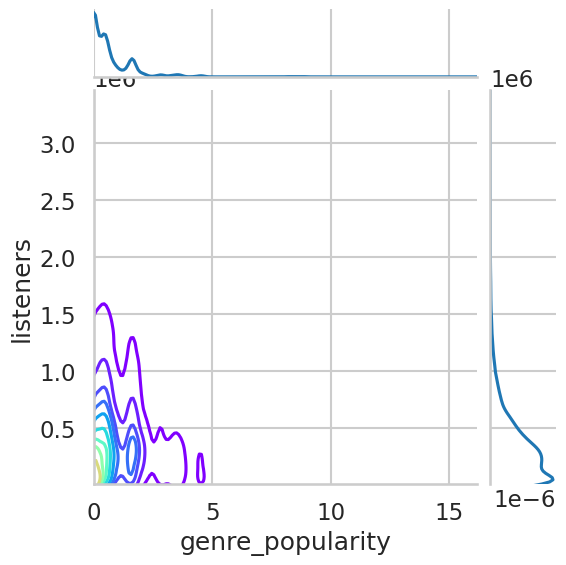

In [33]:
jointplot = sns.jointplot(data=df, y='listeners', x='genre_popularity', kind='kde', cmap='rainbow')
jointplot.ax_joint.set_xlim(df['genre_popularity'].min(), df['genre_popularity'].max())
jointplot.ax_joint.set_ylim(df['listeners'].min(), df['listeners'].max())
plt.show()


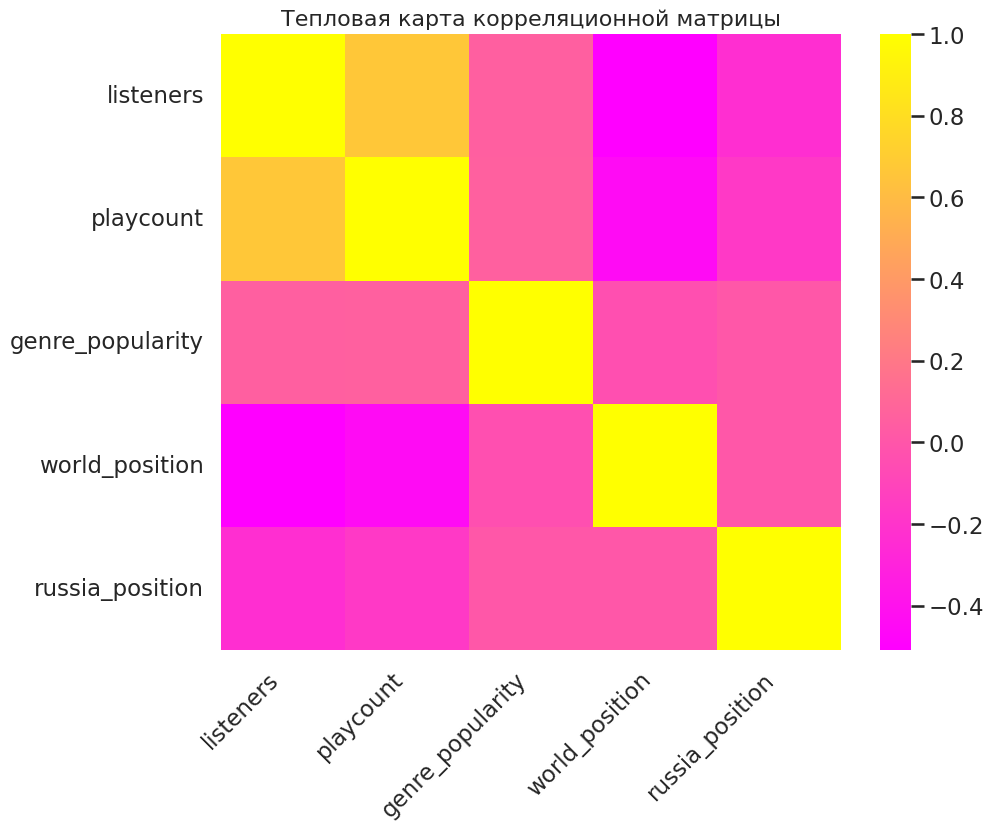

In [36]:
num_columns = ['listeners', 'playcount', 'genre_popularity', 'world_position', 'russia_position']
num_df = df[num_columns]

corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='spring')

plt.title('Тепловая карта корреляционной матрицы', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [35]:
data = df[['genre', 'playcount']].dropna()

data['playcount'] = pd.to_numeric(data['playcount'], errors='coerce')

fig = px.box(data, x='genre', y='playcount', title="Распределение количества прослушиваний по жанрам")
fig.update_layout(xaxis_title="Жанр", yaxis_title="Количество прослушиваний", xaxis_tickangle=-45)
fig.show()
